HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6575822467887359748\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-143965673759205161\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6575822467887359748\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

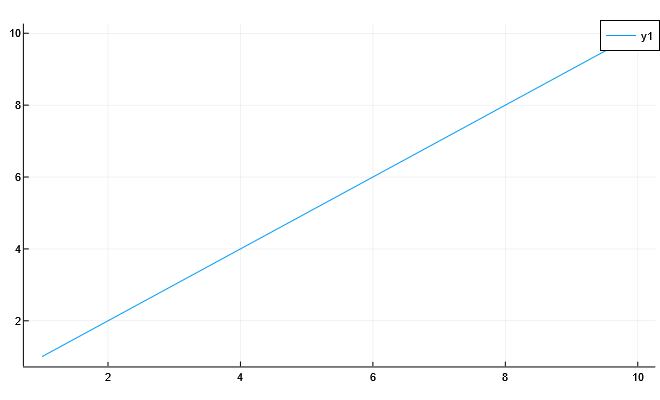

In [1]:
using Plots
plotlyjs()
plot(1:10)

In [2]:
include("../src/test.jl")

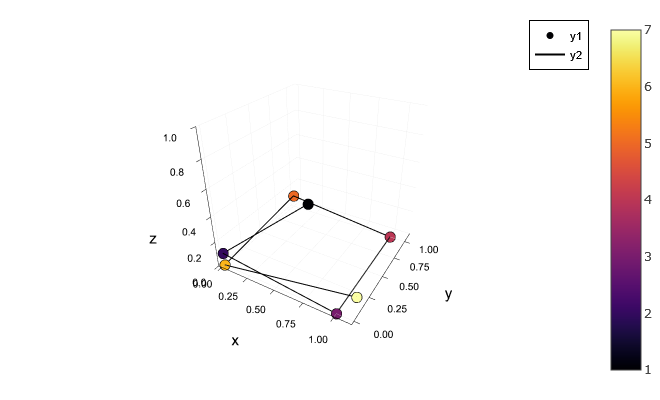

In [3]:
Q = fourKnot(1.1)
fig = Plots.plot(zlim=(0,1))
plotChain!(Q)
display(fig)

In [4]:
plotlyjs()

Plots.PlotlyJSBackend()

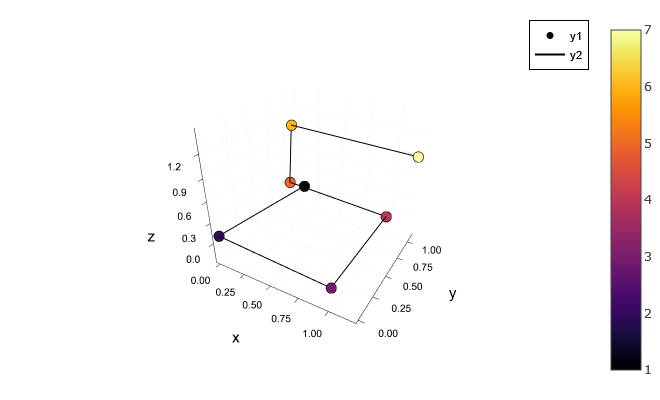

In [5]:
newQ = copy(Q)
newQ = dihedralRotate(newQ,3,pi/2)
fig = Plots.plot(zlim=(-0.3,1.5))
plotChain!(newQ)
display(fig)

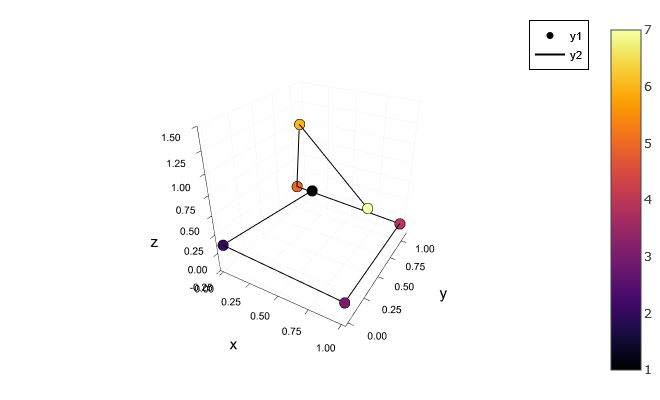

In [6]:
newQ = dihedralRotate(newQ,4,-pi/4)
fig = Plots.plot(zlim=(-0.25,1.5))
plotChain!(newQ)
display(fig)

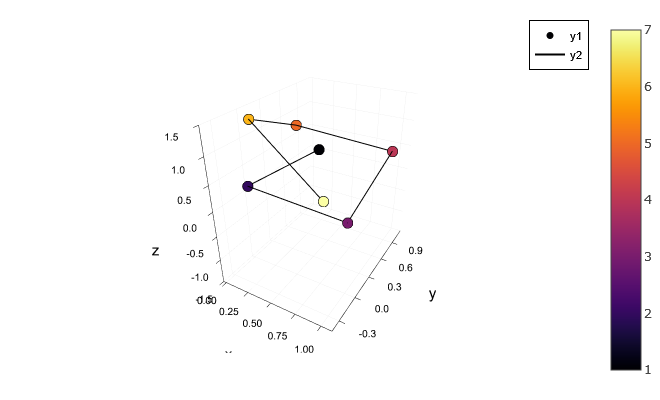

In [7]:
newQ = dihedralRotate(newQ,1,pi/4)
fig = Plots.plot(zlim=(-1.5,1.5))
plotChain!(newQ)
display(fig)

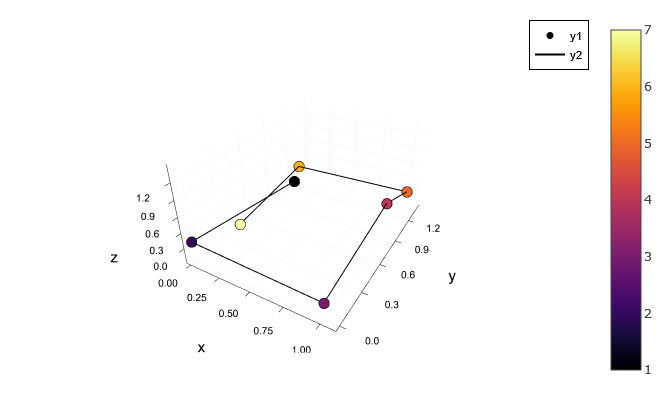

In [8]:
newQ = copy(Q)
newQ = dihedralRotate(newQ,4,-pi/4)
newQ = dihedralRotate(newQ,3,pi/2)
newQ = dihedralRotate(newQ,1,pi/4)
newQ = dihedralRotate(newQ,2,-pi/2)
fig = Plots.plot(zlim=(-0.3,1.5))
plotChain!(newQ)
display(fig)

In [9]:
a,b,c = lengthsAndAngles(newQ)

(BigFloat[1.109053652300661214819051497203656548818132296070768316146046950699394088722155, 1.00498755698465421616159098984391564543761735558093467799131576619685947626031, 1.00000000209642320496778988163399609684749943916705625159801729828650983980512, 1.004987557333444247121032848443734218086305579241960903454846807072488674974557, 1.004987562002011528754571048427123678495632525759171501198662388696933558091843, 1.109053650945429049091059942516329137079885973993619922846315459765163419746869], BigFloat[1.471943990331417073349514625509025730135864606379652752653702194640014324171493, 1.570796325744597799979347894266747579363050131035906125825276288055340083381375, 1.570796324199695697280319582381670130018220648491150578393277660570275877535236, 1.560895176691955270066261471039808408423319174880880088471015440609627686913987, 1.471943980157225019065368214071948493204881988183428320514701713756162073750847], BigFloat[0.86663114921950452109098429672115888012148217083893101934036871086459

In [10]:
a

6-element Vector{BigFloat}:
 1.109053652300661214819051497203656548818132296070768316146046950699394088722155
 1.00498755698465421616159098984391564543761735558093467799131576619685947626031
 1.00000000209642320496778988163399609684749943916705625159801729828650983980512
 1.004987557333444247121032848443734218086305579241960903454846807072488674974557
 1.004987562002011528754571048427123678495632525759171501198662388696933558091843
 1.109053650945429049091059942516329137079885973993619922846315459765163419746869

In [11]:
b

5-element Vector{BigFloat}:
 1.471943990331417073349514625509025730135864606379652752653702194640014324171493
 1.570796325744597799979347894266747579363050131035906125825276288055340083381375
 1.570796324199695697280319582381670130018220648491150578393277660570275877535236
 1.560895176691955270066261471039808408423319174880880088471015440609627686913987
 1.471943980157225019065368214071948493204881988183428320514701713756162073750847

In [13]:
newQ = fourKnot(1.1)
stepsize = pi/1000
diheds = [4,3,2,1]
factor = [-1/4,1/2,1/4,-1/2]
ener = []
for t in 1:1000
    for i in 1:4
        flag = checkRotationIntersection(newQ,diheds[i],factor[i]*stepsize)
        push!(ener,tangentEnergy(newQ))
        if !flag
            newQ = dihedralRotate(newQ,diheds[i],factor[i]*stepsize)
        else
            println(t)
            println(i)
        end
    end
end

375
4
376
4
377
4
378
4
379
4
380
4
381
4
383
2
383
3
384
2
385
2


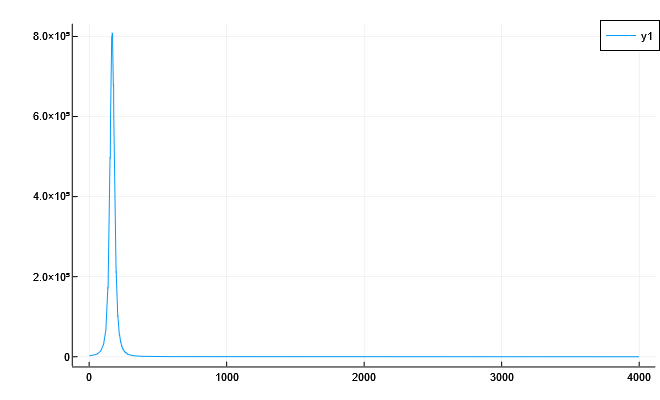

In [15]:
plot(1:4000,ener)

In [18]:
ener[1990]

36.83526035243611489224362561352543256097181525575097009192039223473553622111834